In [1]:
from defillama2 import DefiLlama
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
def human_format_dollar_or_num(dollar=False, decimals=0):
    """ 
    Return a function for formatting matplot axis numbers human friendly. 

    Parameters
    ----------
    dollar: logical
        If True, will add $ in front of the numbers.
    decimals: int
        Number of decimals to display.
    """

    base_fmt = '%.{}f%s'.format(decimals)
    if dollar:
        base_fmt = '$' + base_fmt

    def human_format(num, pos): # pos is necessary as it'll be used by matplotlib
        magnitude = 0
        while abs(num) >= 1000:
            magnitude += 1
            num /= 1000.0
        return base_fmt % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])
    return human_format

## Create a DefiLlama instance

In [3]:
obj = DefiLlama()

## Get historical DeFi TVL on all chains

In [4]:
df = obj.get_defi_hist_tvl()
df.tail()

,tvl
date,
2022-12-25 00:00:00+00:00,"58,104,795,610.1759"
2022-12-26 00:00:00+00:00,"57,724,204,048.5294"
2022-12-27 00:00:00+00:00,"57,923,901,093.8461"
2022-12-28 00:00:00+00:00,"57,553,325,102.0017"
2022-12-29 00:00:00+00:00,"57,001,307,106.5940"


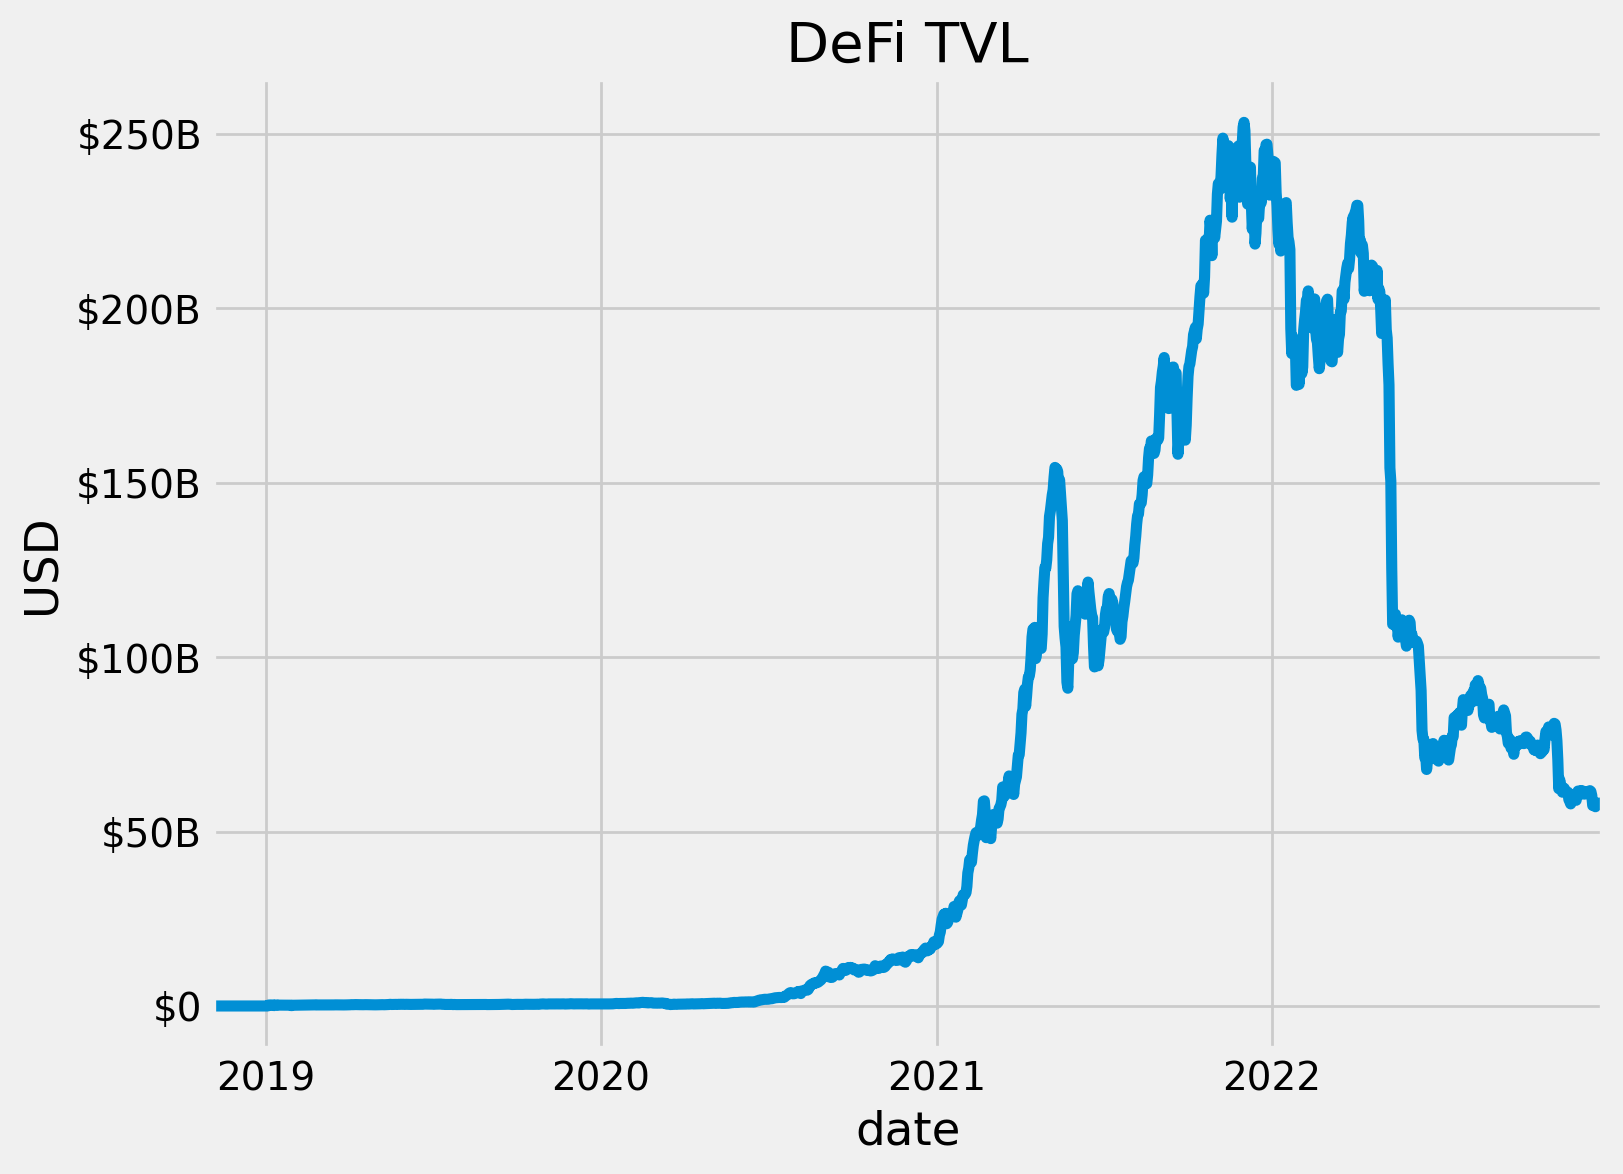

In [5]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("DeFi TVL");

## Get historical TVL of a chain

In [6]:
df = obj.get_chain_hist_tvl('Arbitrum')
df.tail()

,tvl
date,
2022-12-25 00:00:00+00:00,"1,157,857,147.7011"
2022-12-26 00:00:00+00:00,"1,159,140,018.3024"
2022-12-27 00:00:00+00:00,"1,159,040,736.5425"
2022-12-28 00:00:00+00:00,"1,141,823,922.3208"
2022-12-29 00:00:00+00:00,"1,119,289,899.5158"


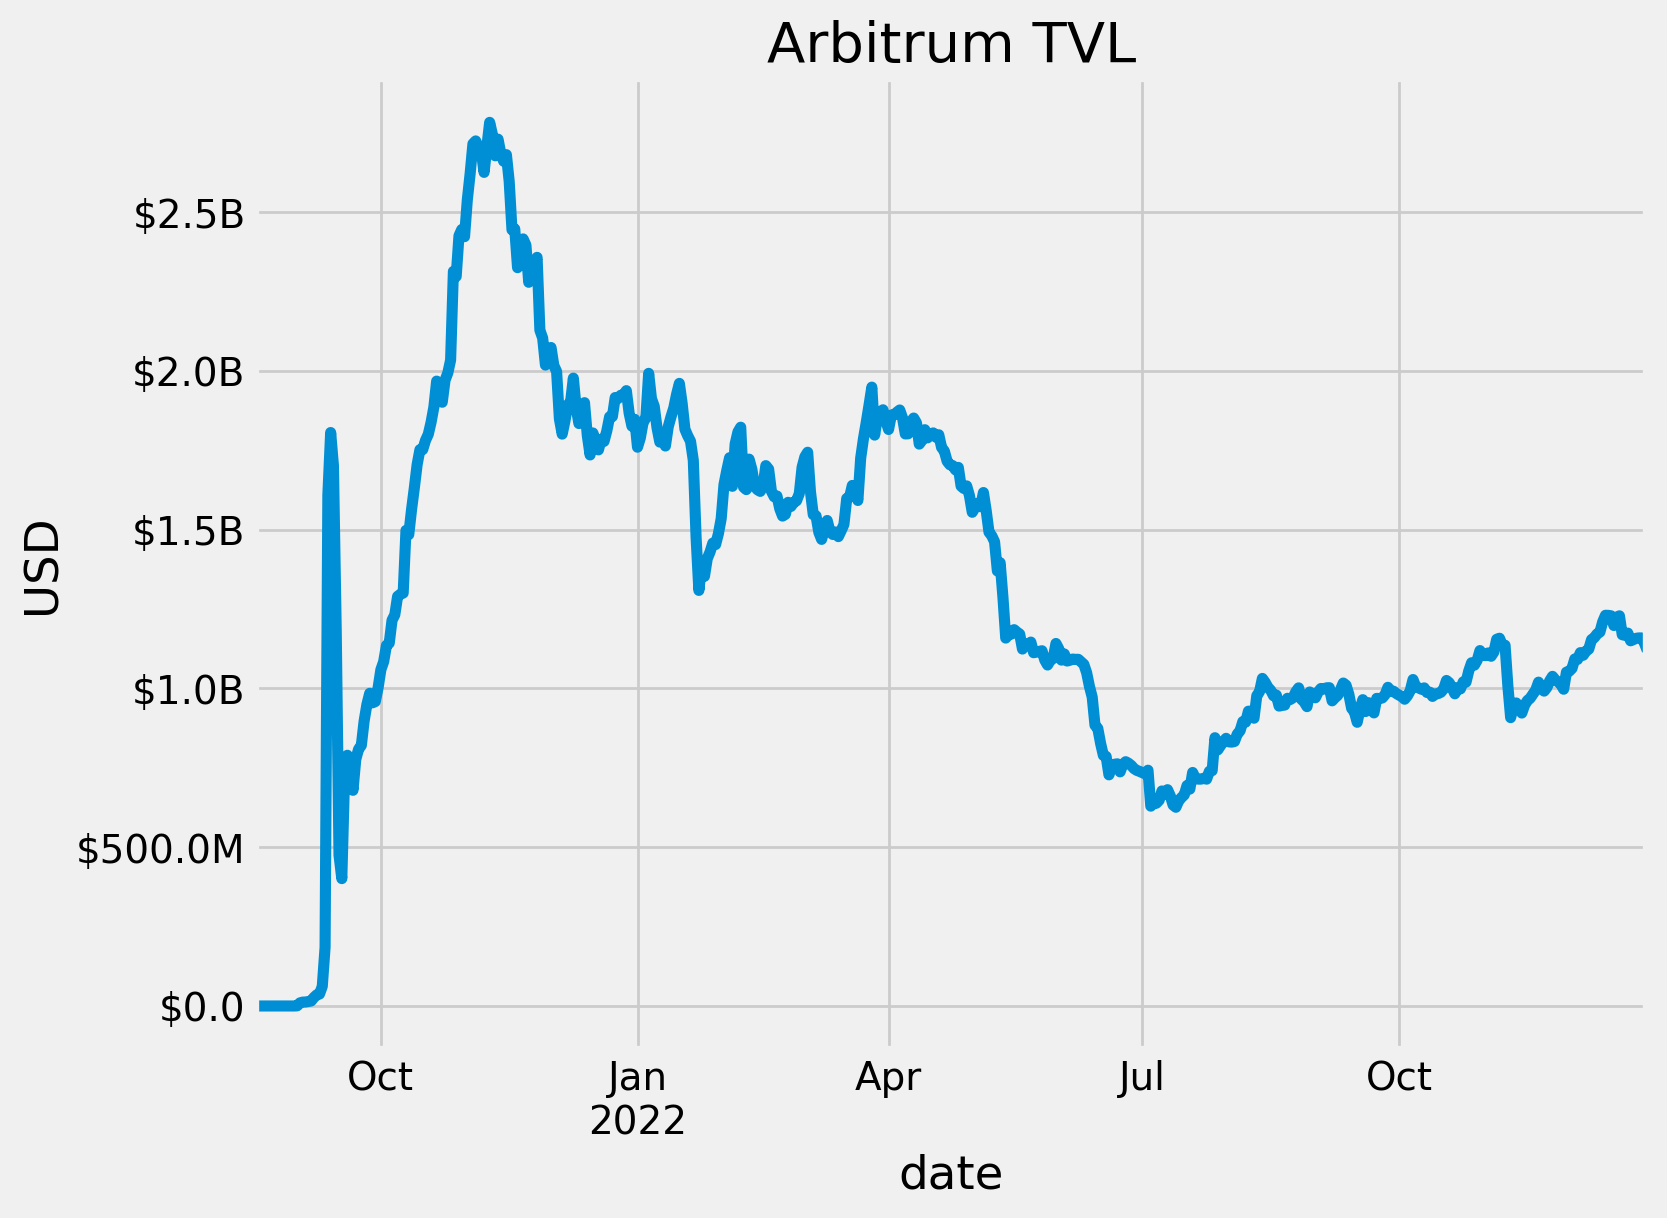

In [7]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=1))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("Arbitrum TVL");

## Get current TVL of all chains

In [11]:
df = obj.get_chains_curr_tvl()

# print top 10 chains by tvl
df = df.sort_values('tvl', ascending=False) 
df.head(10)

,chain,token,tvl
4,Ethereum,ETH,"38,768,977,212.5332"
12,Binance,BNB,"4,978,279,584.3069"
65,Tron,TRON,"4,176,900,844.1364"
8,Polygon,MATIC,"1,164,800,501.4858"
10,Arbitrum,None,"1,119,289,899.5158"
7,Avalanche,AVAX,"950,907,980.4243"
0,Optimism,OP,"632,144,228.8599"
11,Fantom,FTM,"501,599,039.8146"
32,Cronos,CRO,"420,398,040.8466"
15,Solana,SOL,"397,324,496.6773"


## Get current TVL of a protocol

In [16]:
print('Current TVL of Uniswap:', obj.get_protocol_curr_tvl('uniswap'))
print('Current TVL of Aave:', obj.get_protocol_curr_tvl('aave'))

Current TVL of Uniswap: 3308118203.41695
Current TVL of Aave: 3696341243.1038604


In [17]:
obj.get_protocol_curr_tvl('gmx')

{'tvlPrev1Week': 472584695.9755583,
 'avax': 56502105.4582058,
 'avax-staking': 15690019.98,
 'tvlPrev1Day': 466737176.3689752,
 'arbitrum-staking': 283141457.49,
 'SK': 1672293587,
 'arbitrum': 407612838.1039226,
 'tvl': 464114943.5621284,
 'PK': 'hourlyTvl#337',
 'staking': 298831477.47,
 'tvlPrev1Hour': 463746646.864406}

In [18]:
obj.get_protocol_curr_tvl('premia')

{'optimism': 1064244.3223645305,
 'tvl': 7327389.327511598,
 'tvlPrev1Hour': 7323132.085027508,
 'bsc': 9040.988994756219,
 'ethereum': 1990879.6955494578,
 'tvlPrev1Week': 7363053.692536049,
 'ethereum-staking': 3227561.845704979,
 'tvlPrev1Day': 7341396.414038988,
 'SK': 1672293587,
 'arbitrum': 3215434.700573643,
 'PK': 'hourlyTvl#381',
 'fantom': 1047789.6200292119,
 'staking': 3227561.845704979}

## Get current TVL of a protocol broken down by chain

In [45]:
df = obj.get_protocol_curr_tvl_by_chain('gmx')
df

,tvl
Avalanche,"56,502,105.4582"
Avalanche-staking,"15,690,019.9800"
Arbitrum-staking,"283,141,457.4900"
Arbitrum,"407,612,838.1039"


In [46]:
dd = obj.get_protocol_curr_tvl('gmx')
df2 = pd.DataFrame(dd, index=range(1))
df2 = df2[['avax', 'avax-staking', 'arbitrum-staking', 'arbitrum']].T
df2.columns = ['tvl']
df2

,tvl
avax,"56,502,105.4582"
avax-staking,"15,690,019.9800"
arbitrum-staking,"283,141,457.4900"
arbitrum,"407,612,838.1039"


In [47]:
df = obj.get_protocol_curr_tvl_by_chain('premia')
df

,tvl
Optimism,"1,064,244.3224"
Binance,"9,040.9890"
Ethereum,"1,990,879.6956"
Ethereum-staking,"3,227,561.8457"
Arbitrum,"3,215,434.7006"
Fantom,"1,047,789.6200"


In [49]:
dd = obj.get_protocol_curr_tvl('premia')
df2 = pd.DataFrame(dd, index=range(1))
df2 = df2[['optimism', 'bsc', 'ethereum', 'ethereum-staking', 
           'arbitrum', 'fantom']].T
df2.columns = ['tvl']
df2

,tvl
optimism,"1,064,244.3224"
bsc,"9,040.9890"
ethereum,"1,990,879.6955"
ethereum-staking,"3,227,561.8457"
arbitrum,"3,215,434.7006"
fantom,"1,047,789.6200"


In [50]:
# let's get AAVE's current TVL
obj.get_protocol_curr_tvl_by_chain('aave')

,tvl
pool2,"71,834,609.6577"
Polygon-borrowed,"86,648,046.2997"
Ethereum-pool2,"71,834,609.6577"
Ethereum,"3,002,087,186.9603"
Avalanche,"291,370,805.7765"
Ethereum-staking,"129,444,080.0140"
Polygon,"251,797,211.2301"
Ethereum-borrowed,"1,536,993,180.7675"
borrowed,"1,857,959,336.2788"
Avalanche-borrowed,"183,208,070.1200"


## Get historical TVL of a protocol by chain

In [51]:
dd = obj.get_protocol_hist_tvl_by_chain('gmx')

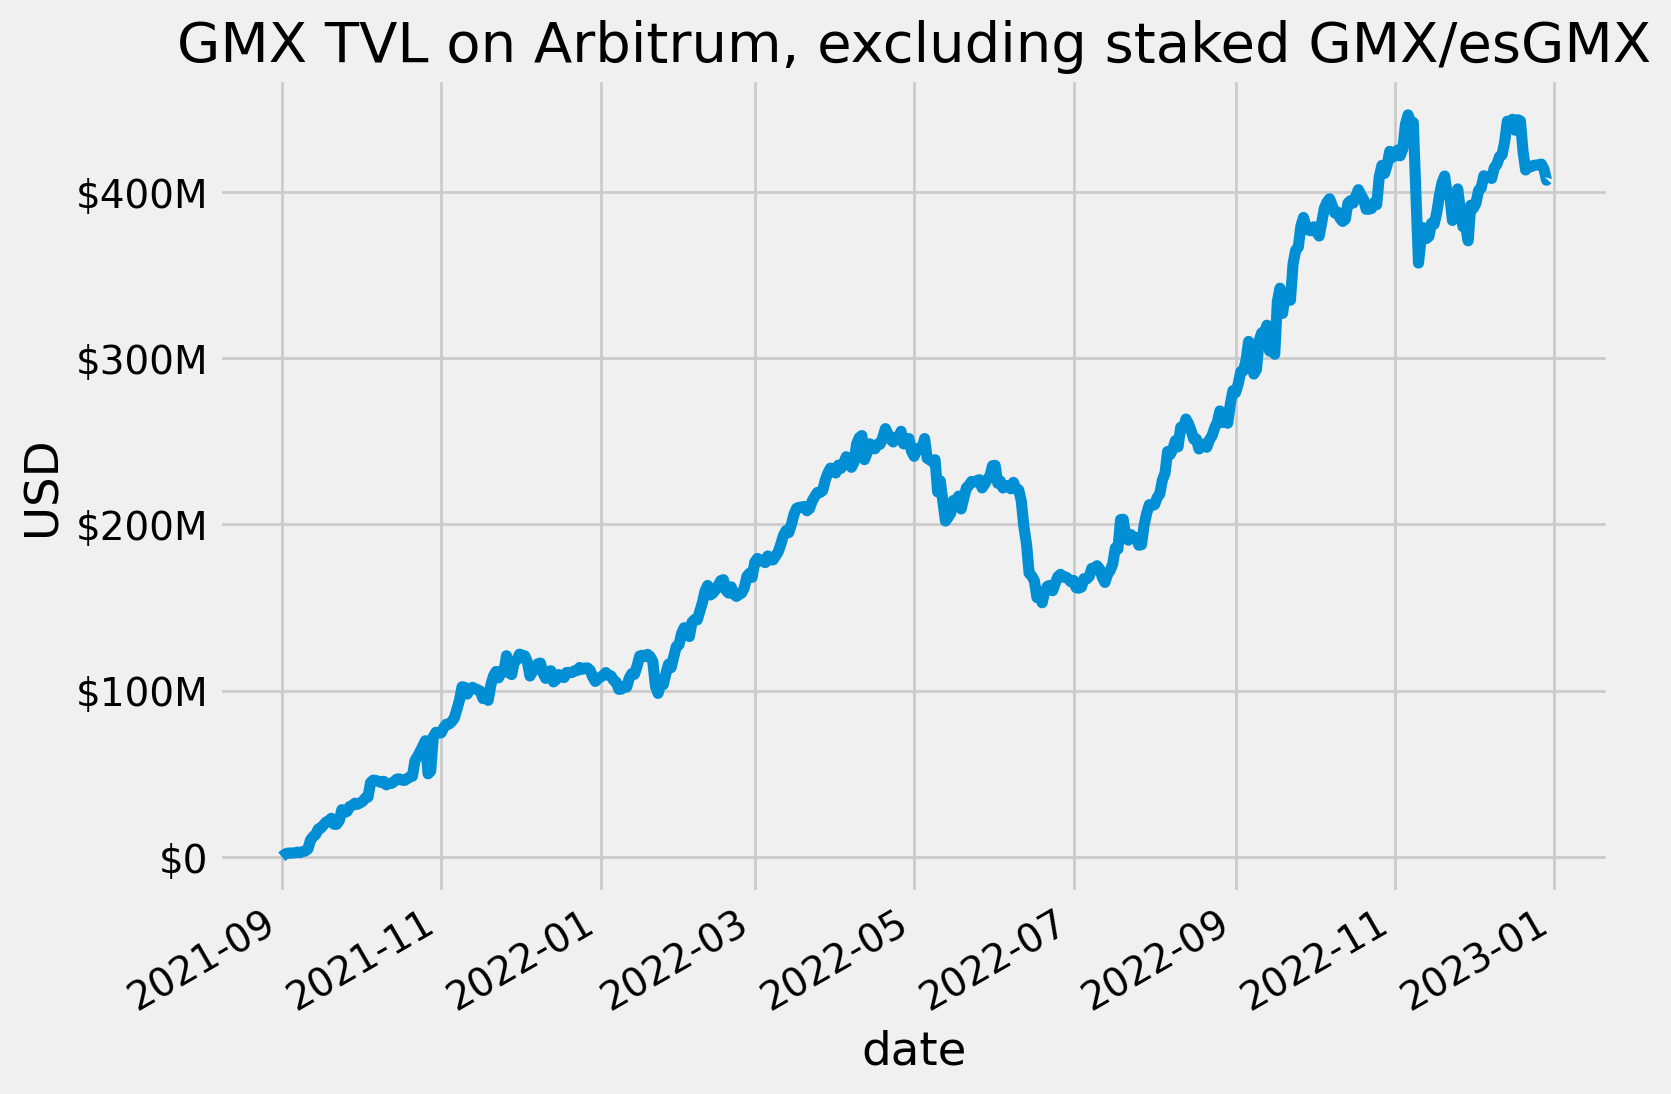

In [52]:
ax = dd['Arbitrum'].tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Arbitrum, excluding staked GMX/esGMX");

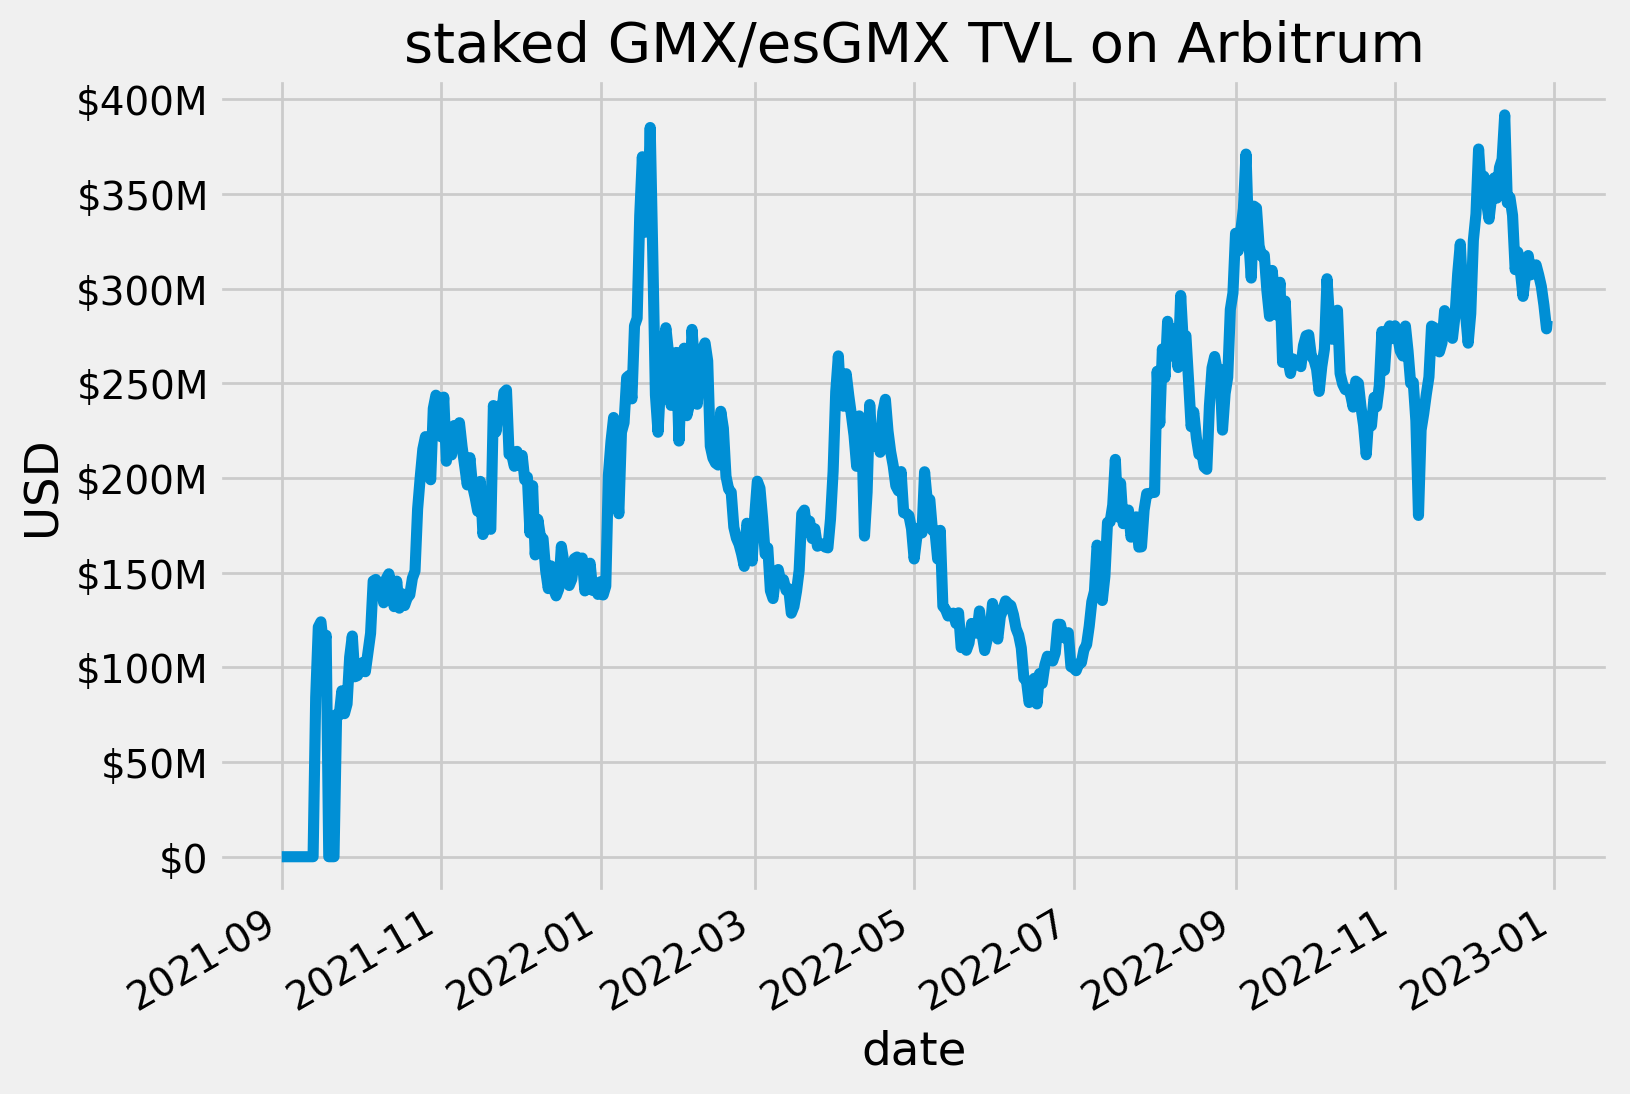

In [53]:
ax = dd['Arbitrum-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Arbitrum");

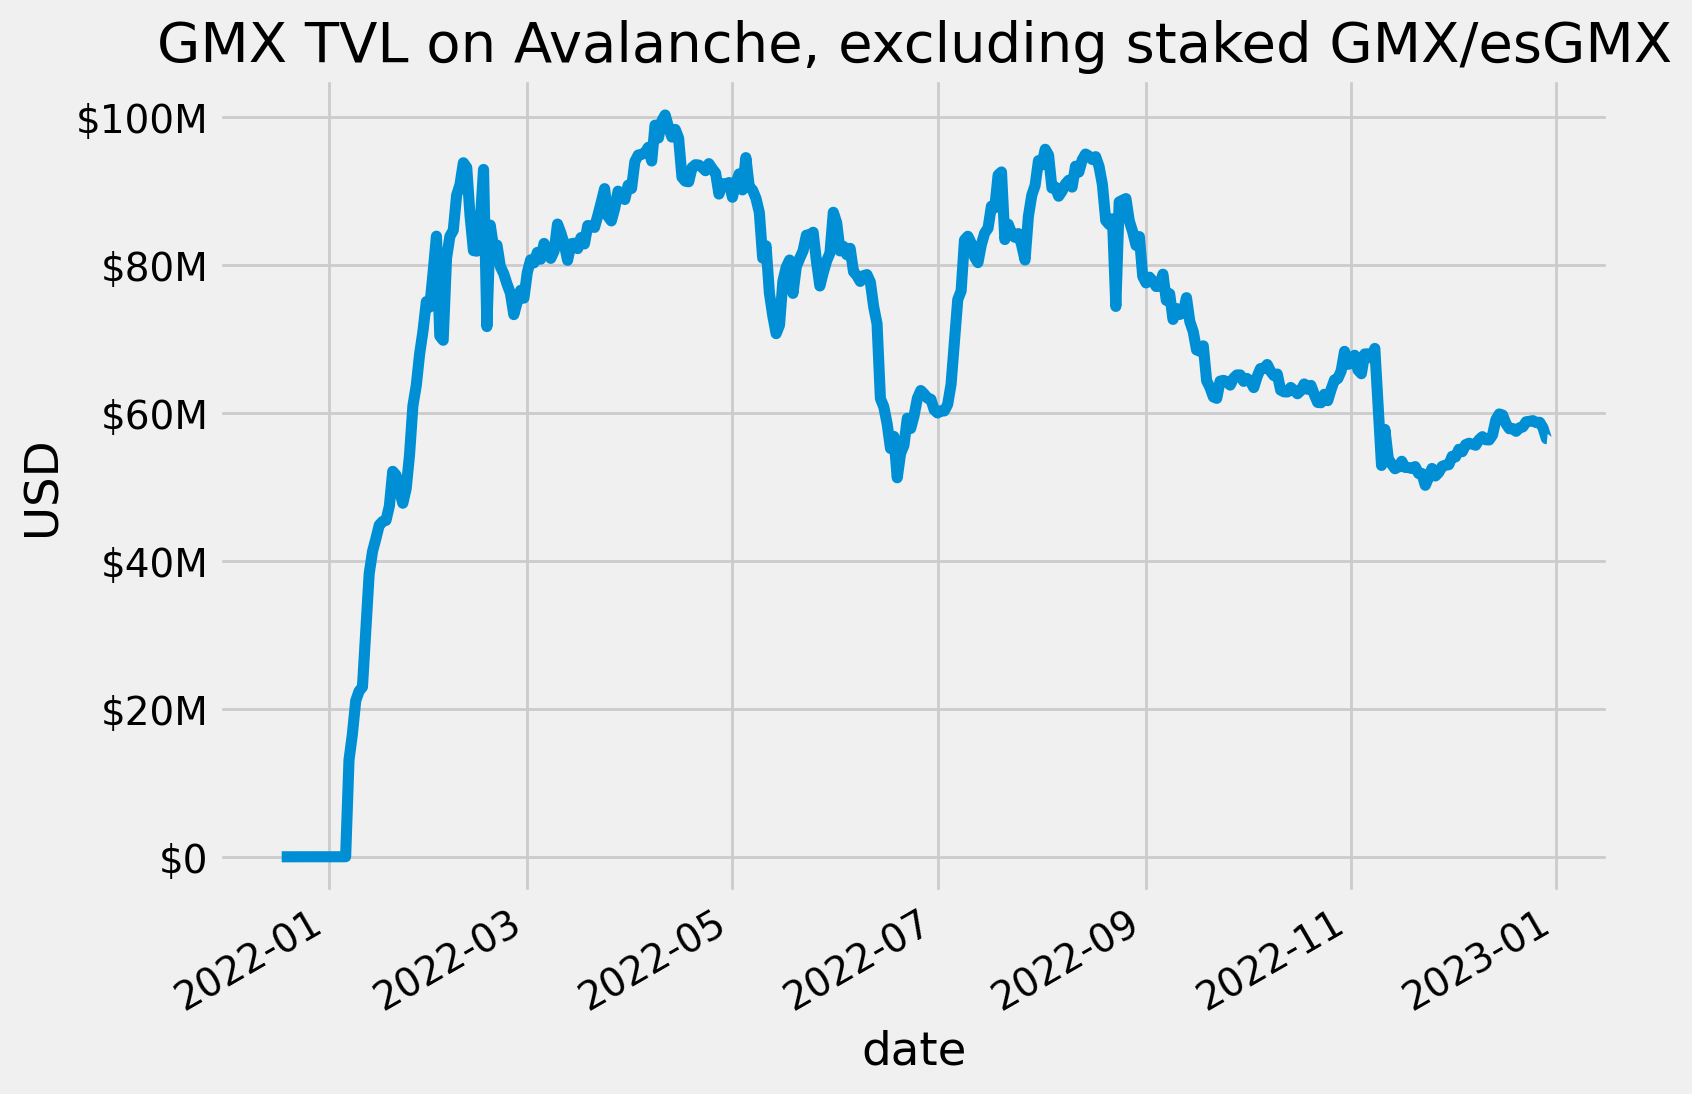

In [54]:
ax = dd['Avalanche'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Avalanche, excluding staked GMX/esGMX");

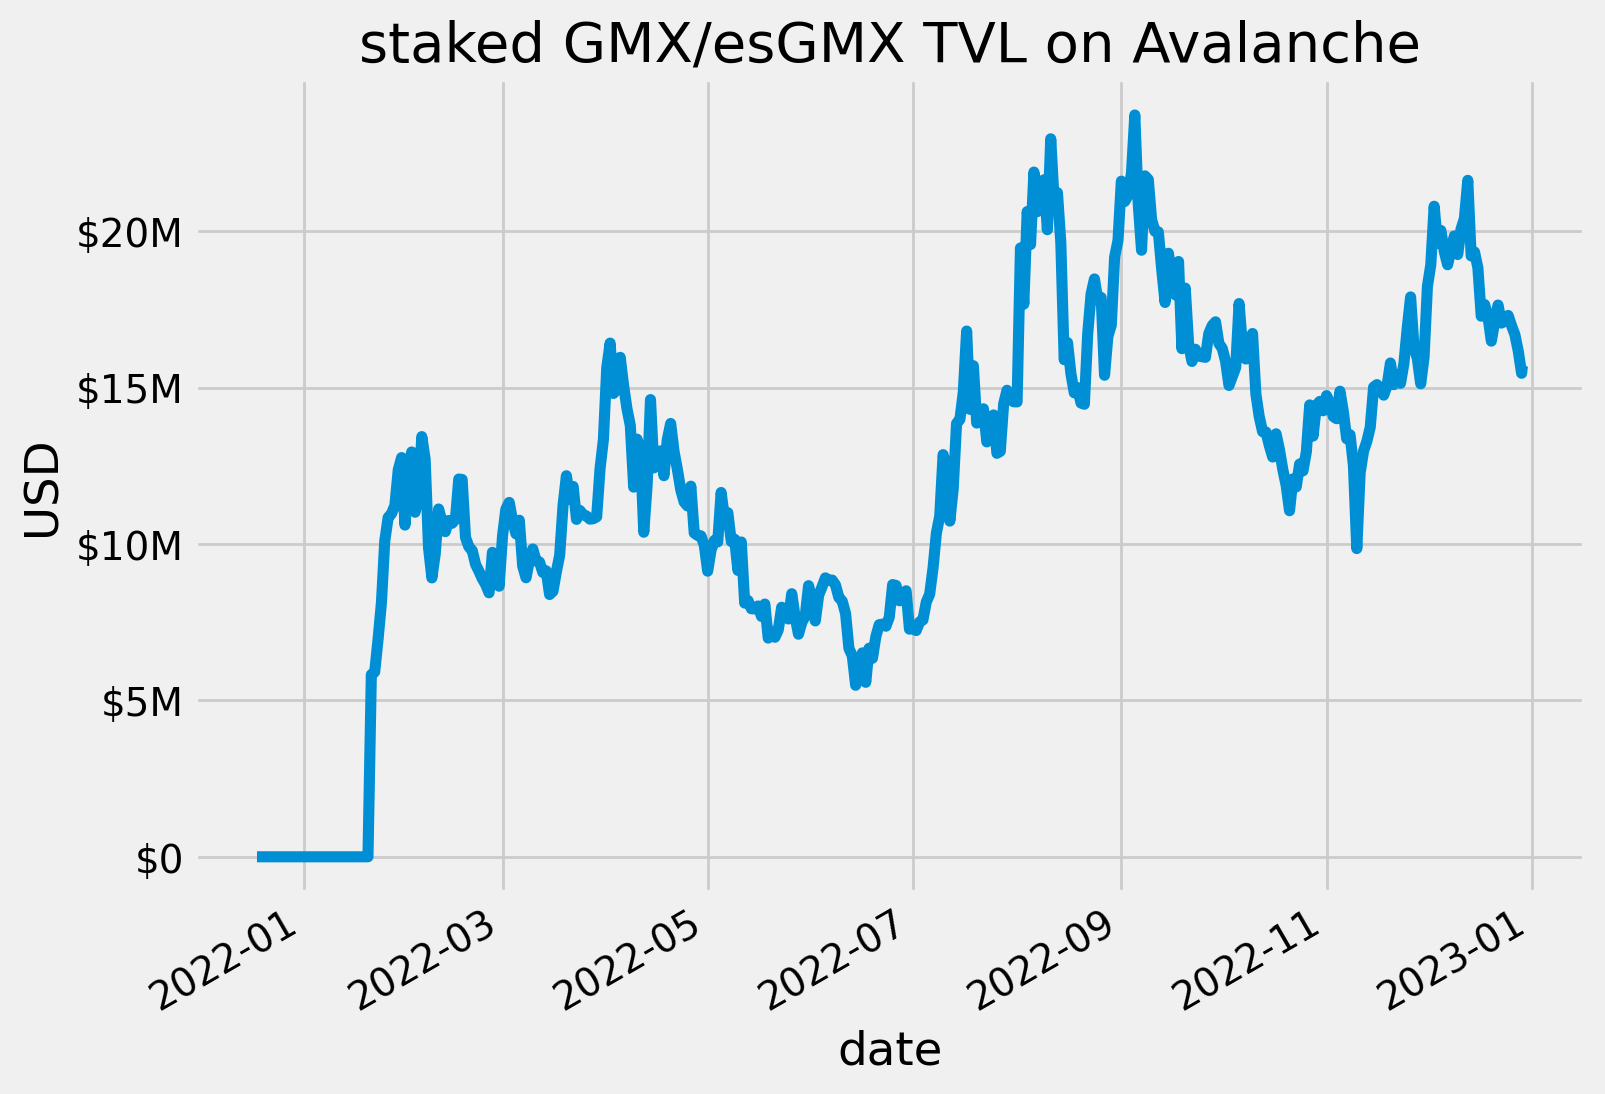

In [55]:
ax = dd['Avalanche-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Avalanche");

## Get fundamentals for all protocols

In [56]:
df = obj.get_protocols_fundamentals()
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(10)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,Binance CEX,-,Multi-Chain,CEX,"[Ethereum, Binance, Tron, Bitcoin]","54,750,666,968.0375",-0.0324,-2.0624,NaN,NaN,[]
1,Bitfinex,-,Multi-Chain,CEX,"[Bitcoin, Ethereum, Tron, Polygon, Polkadot, E...","6,456,989,026.7230",-1.4907,-3.9610,NaN,NaN,[]
2,OKX,-,Multi-Chain,CEX,"[Ethereum, Bitcoin, Tron, Polygon, Optimism, A...","6,443,395,106.5914",-0.3803,1.1851,NaN,NaN,[]
3,Polygon Bridge & Staking,MATIC,Polygon,Chain,[Polygon],"6,127,278,854.6199",-0.4522,-1.6235,"8,402,012,829.0000","7,451,527,306.0000",NaN
4,MakerDAO,MKR,Ethereum,CDP,[Ethereum],"5,904,934,585.2195",-0.6033,-2.1646,"649,099,575.0000","581,795,877.0000",NaN
5,Lido,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]","5,861,940,517.8325",0.3220,-1.0928,"1,121,625,773.0000","869,179,949.0000",NaN
6,Curve,CRV,Multi-Chain,Dexes,"[Ethereum, Arbitrum, Polygon, Optimism, Fantom...","3,622,119,457.1738",0.0473,-0.2675,"2,257,564,419.0000","435,520,308.0000",NaN
7,AAVE V2,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]","3,200,745,119.1460",-0.2364,-0.6310,"939,330,982.0000","832,460,813.0000",NaN
8,Huobi,-,Multi-Chain,CEX,"[Ethereum, Bitcoin, Tron, Polygon, Avalanche, ...","3,124,011,548.8457",-0.9490,-2.9497,NaN,NaN,[]
9,WBTC,WBTC,Ethereum,Bridge,[Ethereum],"3,034,925,451.6428",-0.5093,-2.1118,"3,829,421,445.0000","3,829,421,445.0000",NaN


In [57]:
# find the 5 protocols with the biggest % jump in TVL in last 7 days
df.sort_values('change_7d', ascending=False, ignore_index=True).head(5)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,TempleDAO,TEMPLE,Ethereum,Reserve Currency,[Ethereum],"2,977,116.9113",0.0879,"1,203.6029",NaN,NaN,NaN
1,Antex,ANTEX,Binance,Launchpad,[Binance],"152,905.0033",384.2999,377.6299,"782,684.0000",0.0000,[]
2,Option Dance,-,Mixin,Options,[Mixin],"1,055,262.9600",10.3517,298.9342,NaN,NaN,[]
3,Gains Network,GNS,Polygon,Derivatives,[Polygon],"19,378,495.1800",0.4308,230.9042,"114,639,870.0000","114,639,870.0000",NaN
4,Credix,-,Solana,RWA Lending,[Solana],"95,864.9259",66.4345,168.2230,NaN,NaN,[]


In [58]:
# derive other metrics
ha = (df.loc[:, ['name', 'category', 'tvl', 'fdv', 'mcap']]
        .assign(mcap_per_tvl = df.mcap / df.tvl, fdv_per_tvl = df.fdv / df.tvl)
     )
ha          

,name,category,tvl,fdv,mcap,mcap_per_tvl,fdv_per_tvl
0,Binance CEX,CEX,"54,750,666,968.0375",NaN,NaN,NaN,NaN
1,Bitfinex,CEX,"6,456,989,026.7230",NaN,NaN,NaN,NaN
2,OKX,CEX,"6,443,395,106.5914",NaN,NaN,NaN,NaN
3,Polygon Bridge & Staking,Chain,"6,127,278,854.6199","8,402,012,829.0000","7,451,527,306.0000",1.2161,1.3712
4,MakerDAO,CDP,"5,904,934,585.2195","649,099,575.0000","581,795,877.0000",0.0985,0.1099
...,...,...,...,...,...,...,...
2208,Valkyrie,Launchpad,0.0000,"1,598,382.0000","265,380.0000",inf,inf
2209,KawaiiSwap,Yield,0.0000,NaN,NaN,NaN,NaN
2210,Louverture,Yield,0.0000,"14,400.1900",0.0000,NaN,inf
2211,Wisteria Swap,Yield,0.0000,NaN,0.0000,NaN,NaN


In [59]:
# aggregate by category
ha.groupby('category')[['tvl', 'fdv', 'mcap']].sum()

,tvl,fdv,mcap
category,,,
Algo-Stables,"1,234,402,279.5225","1,041,131,179,530.3401","499,090,308.0000"
Bridge,"7,693,511,547.8475","4,899,221,474.0000","4,396,349,422.0000"
CDP,"7,879,226,461.4202","2,639,626,387.0000","1,033,401,371.0000"
CEX,"83,743,410,242.6913",0.0000,0.0000
Chain,"6,384,657,872.6517","9,052,488,185.0000","7,953,859,607.0000"
Cross Chain,"733,093,619.5815","793,136,543.0000","271,252,708.0000"
Derivatives,"1,262,572,351.9000","11,948,929,480,151.0000","976,418,873.0000"
Dexes,"15,559,320,637.5534","25,698,883,104.0200","10,887,728,622.9500"
Exotic Options,"40,055,201.6598",0.0000,0.0000
